In [1]:
# pip install --upgrade scikit-learn imbalanced-learn


In [2]:
# pip install --upgrade imbalanced-learn scikit-learn

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# About The Data

In [4]:
data = pd.read_csv("bank-additional.csv", delimiter=';')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [6]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# 1. Data Cleaning

In [8]:
print(data.isna().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [9]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data[categorical_cols] = data[categorical_cols].astype('category')


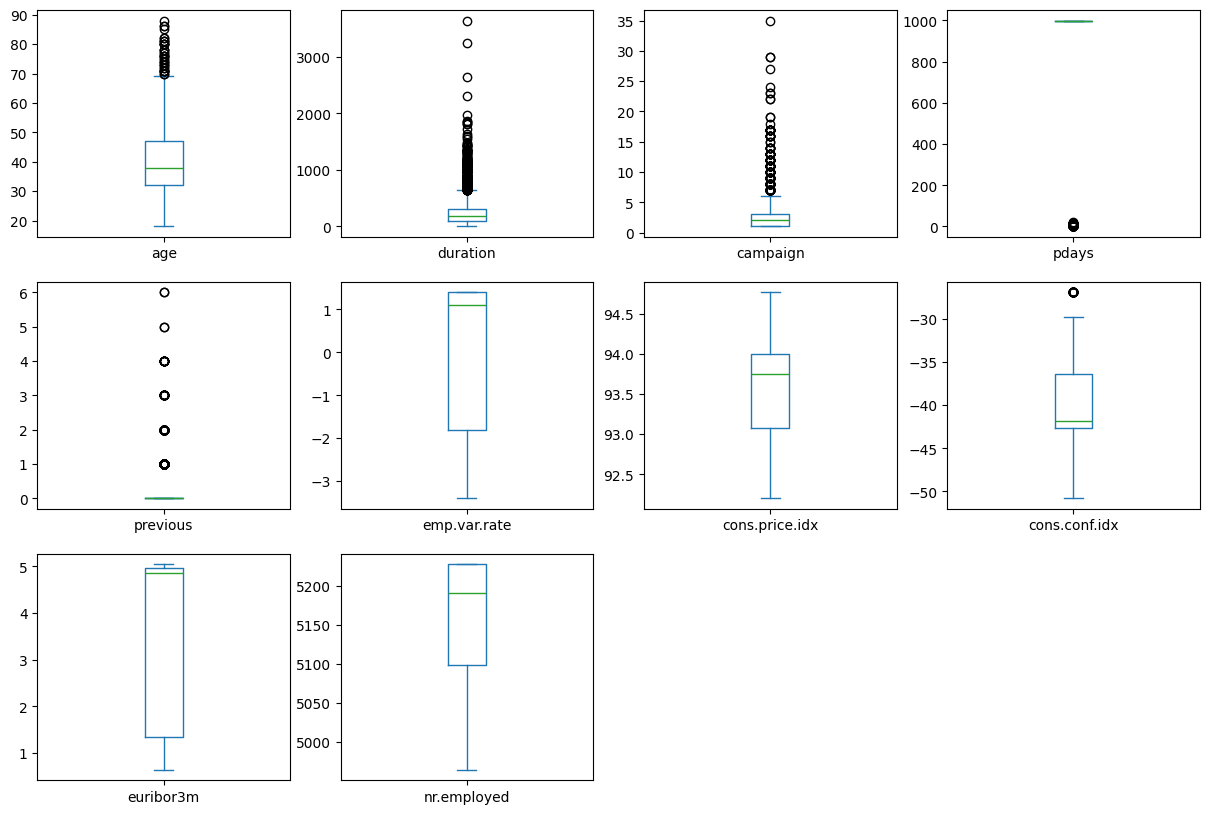

In [10]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
data[numerical_cols].plot(kind='box', subplots=True, layout=(3,4), figsize=(15,10))
plt.show()


In [11]:
encoder = LabelEncoder()

# waht ıs encodıng

In [12]:
labels = encoder.fit_transform(categorical_cols)

In [13]:
data[categorical_cols] = labels

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   int64  
 2   marital         4119 non-null   int64  
 3   education       4119 non-null   int64  
 4   default         4119 non-null   int64  
 5   housing         4119 non-null   int64  
 6   loan            4119 non-null   int64  
 7   contact         4119 non-null   int64  
 8   month           4119 non-null   int64  
 9   day_of_week     4119 non-null   int64  
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   int64  
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [15]:
# Calculate the 25th and 75th percentiles (Q1 and Q3) for the 'campaign' and 'duration' columns
Q1 = data[['campaign', 'duration']].quantile(0.18)
Q3 = data[['campaign', 'duration']].quantile(0.82)

# Interquartile Range (IQR)
IQR = Q3 - Q1

# threshold for outliers
threshold = 1.3

# lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Count the number of rows before removing outliers
num_rows_before = len(data)

# Remove outliers
data = data[(data['campaign'] >= lower_bound['campaign']) & (data['campaign'] <= upper_bound['campaign'])]
data = data[(data['duration'] >= lower_bound['duration']) & (data['duration'] <= upper_bound['duration'])]

# Drop rows where 'age' is greater than 90
data = data[data['age'] <= 90]

# Print the 10th and 90th percentiles (Q1 and Q3)
print("10th Percentile (Q1):\n", Q1)
print("90th Percentile (Q3):\n", Q3)


10th Percentile (Q1):
 campaign     1.0
duration    84.0
Name: 0.18, dtype: float64
90th Percentile (Q3):
 campaign      4.0
duration    389.0
Name: 0.82, dtype: float64


In [16]:
# Count the number of rows after removing outliers
num_rows_after = len(data)

# Calculate the number of rows removed
num_rows_removed = num_rows_before - num_rows_after

# Print the number of rows removed
print("Number of rows removed:", num_rows_removed)

Number of rows removed: 342


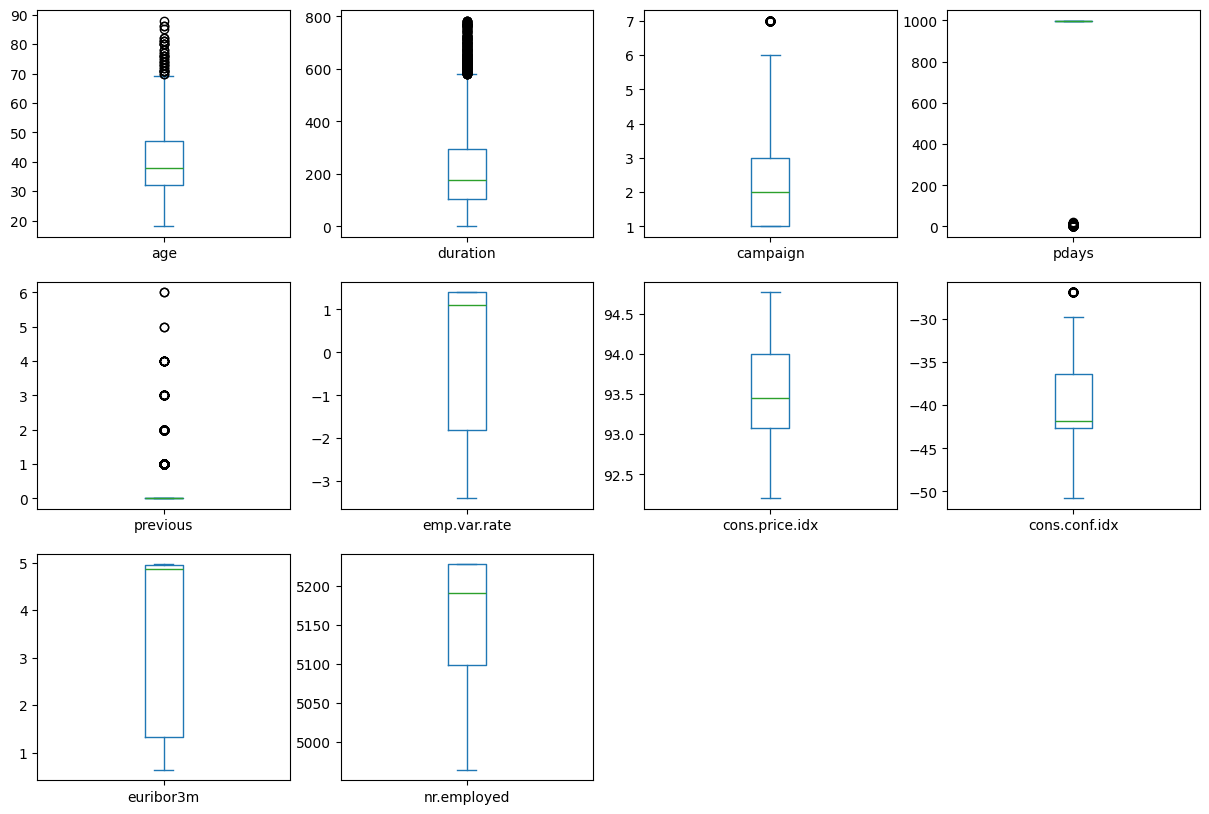

In [17]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
data[numerical_cols].plot(kind='box', subplots=True, layout=(3,4), figsize=(15,10))
plt.show()


# 2. Data Preprocessing

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize Standard Scaler
scaler = StandardScaler()

# List of numerical columns to scale (update as needed)
numerical_cols = ['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Apply Standard Scaling
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Print the first few rows to check the transformed data
data.head(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-0.975318,5,7,3,2,4,6,0,8,1,...,-0.086393,999,0,9,-1.170429,-1.156625,-1.226793,-1.295067,-0.880067,no
1,-0.103991,5,7,3,2,4,6,0,8,1,...,1.332337,999,0,9,0.672593,0.736195,0.885609,0.732610,0.355422,no
2,-1.459389,5,7,3,2,4,6,0,8,1,...,-0.795759,999,0,9,0.863250,1.545930,-0.278367,0.793864,0.854188,no
3,-0.200805,5,7,3,2,4,6,0,8,1,...,0.622972,999,0,9,0.863250,1.545930,-0.278367,0.792147,0.854188,no
4,0.670522,5,7,3,2,4,6,0,8,1,...,-0.795759,999,0,9,-0.090037,-0.628836,-0.321478,0.352492,0.419952,no


In [19]:
# Transform 'pdays' into a binary feature where 0 means not contacted before (999) and 1 means contacted
data['contacted_before'] = data['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Drop the original 'pdays' column
data.drop('pdays', axis=1, inplace=True)

# View the first few rows to verify the transformation
print(data[['contacted_before']].head())


   contacted_before
0                 0
1                 0
2                 0
3                 0
4                 0


In [20]:
# 'y' needs to be encoded:
if 'y' in data.columns and data['y'].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data['y'] = le.fit_transform(data['y'])
    print("Column 'y' encoded successfully.")

Column 'y' encoded successfully.


# 3. Feature Selection

In [21]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Define a threshold for selecting the features based on correlation
threshold = 0.1  # Adjust as needed

# Find and store features that have a correlation above the threshold with 'y'
important_features = corr_matrix.index[abs(corr_matrix['y']) > threshold].tolist()

# Remove 'y' from the list if it's included
if 'y' in important_features:
    important_features.remove('y')

# Print the important features
print("Important features based on correlation:", important_features)


Important features based on correlation: ['duration', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'contacted_before']


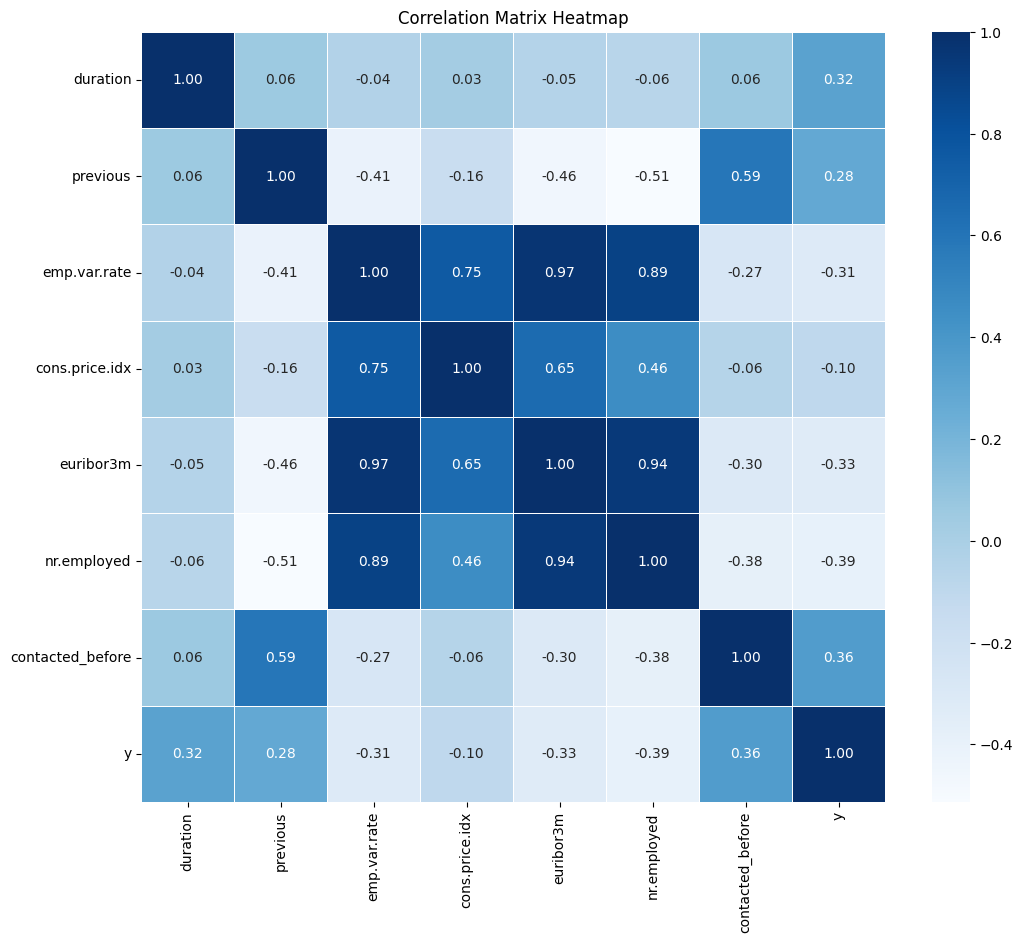

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.loc[important_features + ['y'], important_features + ['y']],
            annot=True, fmt=".2f", cmap='Blues', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


# 4. Model Selection

In [23]:
X = data[important_features]
y = data['y']

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [24]:

from sklearn.svm import SVC



# SMOTE useage ne demek


#  Define pipelines for each model with SMOTE integration
pipelines = {
    'logistic_regression': ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', MinMaxScaler()),
        ('classifier', LogisticRegression())
    ]),
    'random_forest': ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'support_vector_machine': ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', MinMaxScaler()),
        ('classifier', SVC(probability=True)) 
    ])
}

In [25]:
# Fit and evaluate each model
results = {}
best_model = None
best_f1_score = 0

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    report = classification_report(y_test, predictions, output_dict=True)
    f1 = f1_score(y_test, predictions, average='weighted')

    results[name] = {
        'report': classification_report(y_test, predictions),
        'f1_score_weighted': f1,
        'f1_score_class_1': f1_score(y_test, predictions, pos_label=1),
        'f1_score_class_0': f1_score(y_test, predictions, pos_label=0)
    }

    # Select the best model based on the weighted F1 score
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = name

c:\Users\pbci-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\pbci-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
c:\Users\pbci-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEsti

In [26]:

# Print results
for name, result in results.items():
    print(f"{name} Classification Report:\n{result['report']}\n")

print(f"Weighted F1 Scores:")
for name, result in results.items():
    print(f"{name}: {result['f1_score_weighted']}")

print(f"\nBest Model: {best_model} with F1 score {best_f1_score}")


logistic_regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       858
           1       0.34      0.86      0.49        87

    accuracy                           0.84       945
   macro avg       0.66      0.85      0.70       945
weighted avg       0.92      0.84      0.86       945


random_forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       858
           1       0.43      0.62      0.51        87

    accuracy                           0.89       945
   macro avg       0.70      0.77      0.72       945
weighted avg       0.91      0.89      0.90       945


support_vector_machine Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       858
           1       0.33      0.90      0.48        87

    accuracy                           0.82       945


# 5. Hyperparameter Tuning

In [27]:
# Define hyperparameter grids for the best model
param_grids = {
    'random_forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_features': ['sqrt', 'log2'],
        'classifier__max_depth': [None, 10, 20, 30]
    }
}

# Set up the GridSearchCV for the best model
best_pipeline = pipelines[best_model]
grid_search = GridSearchCV(best_pipeline, param_grids[best_model], cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters for {best_model}: {grid_search.best_params_}")
print(f"Best F1 Score (Weighted) from Grid Search: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
print(f"Classification Report for {best_model} on Test Set after Hyperparameter Tuning:\n{classification_report(y_test, predictions)}")

# Print the weighted F1 score on the test set
f1_weighted_test = f1_score(y_test, predictions, average='weighted')
print(f"Weighted F1 Score on Test Set: {f1_weighted_test}")

c:\Users\pbci-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
c:\Users\pbci-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\pbci-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: Th

Best parameters for random_forest: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
Best F1 Score (Weighted) from Grid Search: 0.9015722559783615
Classification Report for Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=42))]) on Test Set after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       858
           1       0.45      0.74      0.56        87

    accuracy                           0.89       945
   macro avg       0.71      0.82      0.75       945
weighted avg       0.92      0.89      0.90       945

Weighted F1 Score on Test Set: 0.9041869159050107


# 6. Model Evaluation

Classification Report for Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=42))]):
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       858
           1       0.45      0.74      0.56        87

    accuracy                           0.89       945
   macro avg       0.71      0.82      0.75       945
weighted avg       0.92      0.89      0.90       945



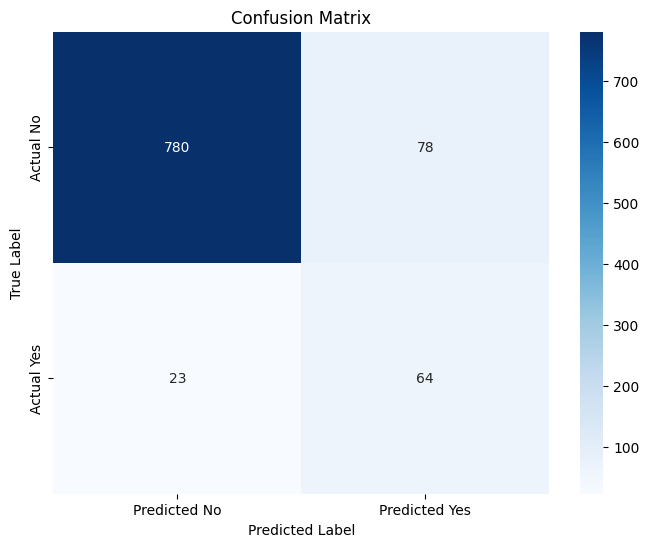

Accuracy: 0.8931
Weighted F1 Score: 0.9042
ROC-AUC Score: 0.9310


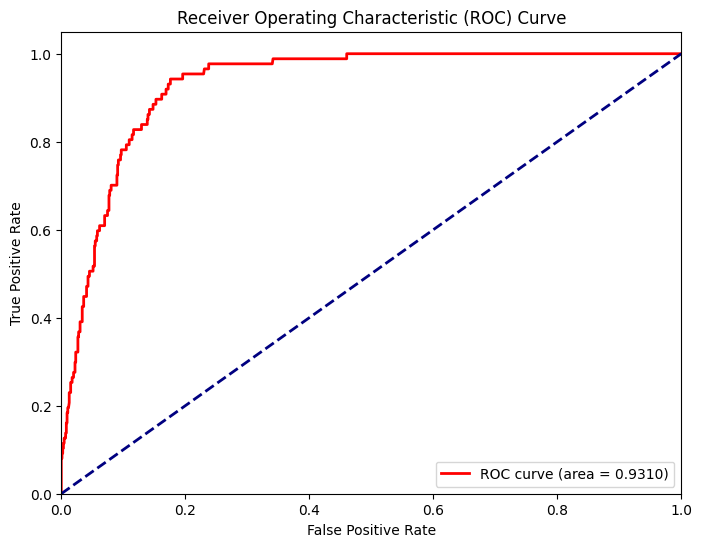

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

    # Classification report
    print(f"Classification Report for {model}:\n{classification_report(y_test, predictions)}")

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")

    # Weighted F1 score
    f1_weighted = f1_score(y_test, predictions, average='weighted')
    print(f"Weighted F1 Score: {f1_weighted:.4f}")

    # ROC-AUC score
    roc_auc = roc_auc_score(y_test, proba)
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc_val = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc_val:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the best model
best_model = grid_search.best_estimator_
evaluate_model(best_model, X_test, y_test)


# BULDING THE PREDICTION SYSTEM


In [29]:
# # # Important features
important_features = [
    'duration', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed',
    'contacted_before', 'contact_cellular', 'contact_telephone',
    'month_dec', 'month_mar', 'month_may', 'month_oct', 'month_sep',
    'poutcome_nonexistent', 'poutcome_success'
]

# Generate random values for each feature
input_data = (
    np.random.uniform(0, 5000),  # duration
    np.random.randint(0, 10),    # previous
    np.random.uniform(-3, 1.5),  # emp.var.rate
    np.random.uniform(0, 5),     # euribor3m
    np.random.uniform(4900, 5300),  # nr.employed
    np.random.randint(0, 2),     # contacted_before (0 or 1)
    np.random.randint(0, 2)      # contact_cellular (missing feature added)

)

# Convert to array
input_data_array = np.asarray(input_data)

# Reshape the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1, -1)

# Use the best_model to predict (assuming best_model is already defined and loaded)
prediction = best_model.predict(input_data_reshaped)
print('Predicted Value:', str(prediction))

Predicted Value: [0]


c:\Users\pbci-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


^
# Saving The Data 

In [30]:
import pickle

filename = 'bank_model.pkl.sav'
pickle.dump(best_model, open(filename,'wb'))

**AUTHORS:**
* Furkan Özbek
* Emir Alparslan Dikici
* Berat Yüceldi
* Zeynep Ece Aşkın

